In [23]:
using ForwardDiff, Plots, IntervalRootFinding, IntervalArithmetic
import Roots

In [18]:
# defining the relperm functions
krw0 = 0.3
kro0 = 0.9
nw = 2
no = 2
sor = 0.2
swc = 0.1
sw_init = max(0.2, swc)

muw = 0.001
muo = 0.003

krw(sw) = krw0*((sw-swc)/(1-swc-sor))^nw
kro(sw) = kro0*((1-sw-sor)/(1-swc-sor))^no

fw(sw) = (krw(sw)/muw)/(krw(sw)/muw+kro(sw)/muo)

dfw = sw -> ForwardDiff.derivative(fw, sw)

fsw_shock = sw -> dfw(sw)-(fw(sw)-fw(sw_init))/(sw-sw_init)

#7 (generic function with 1 method)

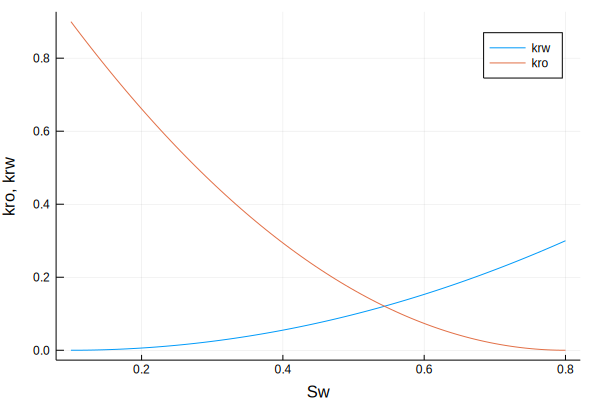

In [13]:
sw = collect(range(swc, stop=1-sor, length=100))
plot(sw, krw.(sw), label="krw")
plot!(sw, kro.(sw), label="kro")
plot!(xlabel="Sw", ylabel="kro, krw")

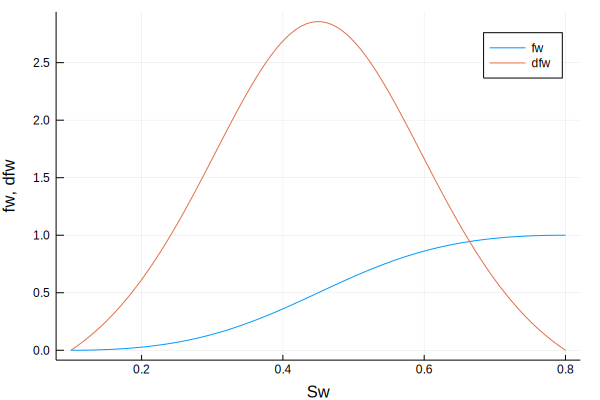

In [15]:
plot(xlabel="Sw", ylabel = "fw, dfw")
plot!(sw, [fw.(sw) dfw.(sw)], label = ["fw", "dfw"])

In [26]:
# test the rootfinding
rts = Roots.find_zeros(fsw_shock, swc, 1-sor)
sw_shock = maximum(rts)

0.5621627686929838

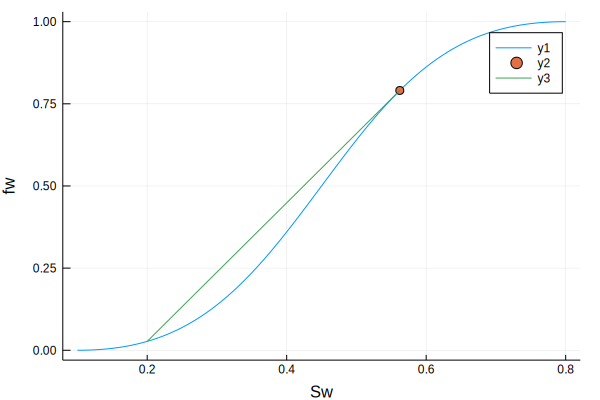

In [28]:
plot(xlabel = "Sw", ylabel = "fw")
plot!(sw, fw.(sw))
scatter!([sw_shock], [fw(sw_shock)])
plot!([sw_init, sw_shock], fw.([sw_init, sw_shock]))